In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#import matplotlib
#matplotlib.use('Agg')
#import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')

In [3]:
!ls -lrt

total 1136
-rw-r--r--  1 leonid  staff  338744 Sep 11 10:54 emission.csv
-rw-r--r--  1 leonid  staff   26481 Sep 11 12:29 out.png
-rw-r--r--  1 leonid  staff   19529 Sep 11 12:38 co2_emission.png
-rw-r--r--  1 leonid  staff   18209 Sep 11 12:38 validation_loss.png
-rw-r--r--  1 leonid  staff   16912 Sep 11 12:38 train_loss.png
-rw-r--r--  1 leonid  staff   18225 Sep 11 12:42 duration.png
-rw-r--r--  1 leonid  staff   33057 Sep 11 12:42 power_consumption.png
-rw-r--r--  1 leonid  staff   91662 Sep 11 12:42 make_plots.ipynb


In [4]:
eco2ai_df = pd.read_csv("emission.csv")

In [5]:
eco2ai_df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 1, epoch: 0, train_loss: 0.904317423361...",2023-09-10 20:10:11,10.053025,0.000105,0.000006,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
1,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 2, epoch: 1, train_loss: 0.053948092734...",2023-09-10 20:10:21,4.835177,0.000054,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
2,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 3, epoch: 2, train_loss: 0.023188810592...",2023-09-10 20:10:26,4.837223,0.000052,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
3,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 4, epoch: 3, train_loss: 0.016180466678...",2023-09-10 20:10:31,4.844995,0.000052,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
4,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 5, epoch: 4, train_loss: 0.012013578831...",2023-09-10 20:10:36,4.857421,0.000052,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 996, epoch: 995, train_loss: 8.77566825...",2023-09-10 21:31:57,4.876785,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
996,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 997, epoch: 996, train_loss: 8.77710256...",2023-09-10 21:32:02,4.869147,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
997,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 998, epoch: 997, train_loss: 8.76358378...",2023-09-10 21:32:07,4.874305,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0
998,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,"epoch: 999, epoch: 998, train_loss: 8.63981164...",2023-09-10 21:32:12,4.887777,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0


In [6]:
#### Prepare the dataset

In [7]:
eco2ai_df['train_loss'] = eco2ai_df['epoch'].apply(lambda x: float(x.split(", ")[2].split('train_loss: ')[-1]))
eco2ai_df['validation_loss'] = eco2ai_df['epoch'].apply(lambda x: float(x.split(", ")[3].split('validation_loss: ')[-1]))
eco2ai_df['epoch'] = eco2ai_df['epoch'].apply(lambda x: int(x.split('epoch: ')[1].strip(', ')))


In [8]:
eco2ai_df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost,train_loss,validation_loss
0,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,1,2023-09-10 20:10:11,10.053025,0.000105,0.000006,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,9.043174e-01,9.043174e-01
1,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,2,2023-09-10 20:10:21,4.835177,0.000054,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,5.394809e-02,5.394809e-02
2,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,3,2023-09-10 20:10:26,4.837223,0.000052,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,2.318881e-02,2.318881e-02
3,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,4,2023-09-10 20:10:31,4.844995,0.000052,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,1.618047e-02,1.618047e-02
4,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,5,2023-09-10 20:10:36,4.857421,0.000052,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,1.201358e-02,1.201358e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,996,2023-09-10 21:31:57,4.876785,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,8.775668e-07,8.775668e-07
996,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,997,2023-09-10 21:32:02,4.869147,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,8.777103e-07,8.777103e-07
997,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,998,2023-09-10 21:32:07,4.874305,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,8.763584e-07,8.763584e-07
998,a8e4408b-2404-49ec-b3dd-3488771a72a5,baler,ML tracking,999,2023-09-10 21:32:12,4.887777,0.000056,0.000003,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz/1 d...,1 device(s),Linux,CH/Zurich,0,8.639812e-07,8.639812e-07


In [28]:
x_tick = [100*i for i in range(0,11)]

In [29]:
x_tick

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

/var/folders/k1/kp3fm3gx4mx0j1y6zg366vsw0000gn/T/ipykernel_11721/1722534327.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick)


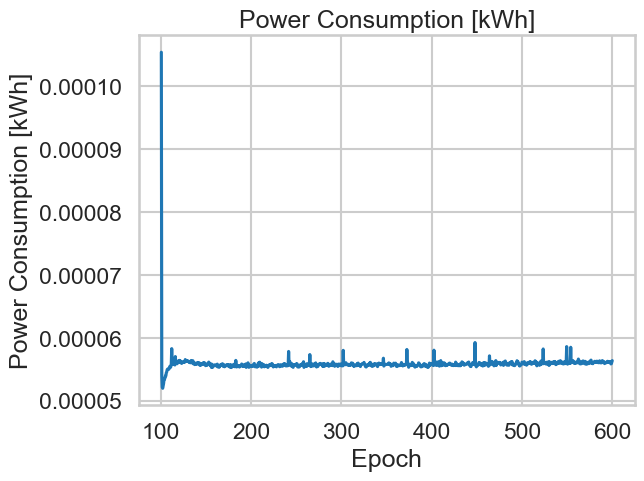

In [30]:
#eco2ai_df['power_consumption(kWh)'].plot()
sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("talk")


ax = sns.lineplot(data=eco2ai_df, x="epoch", y="power_consumption(kWh)",legend="full")
ax.set_xticklabels(x_tick)
ax.set_title('Power Consumption [kWh]')
ax.set_ylabel('Power Consumption [kWh]')
ax.set_xlabel('Epoch')
fig = ax.get_figure()
fig.savefig("power_consumption.png") 


/var/folders/k1/kp3fm3gx4mx0j1y6zg366vsw0000gn/T/ipykernel_11721/4018557711.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick)


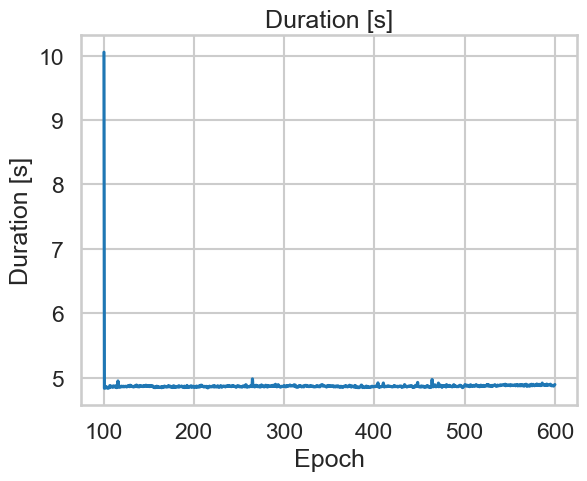

In [31]:
sns.set_context("talk")

ax = sns.lineplot(data=eco2ai_df, x="epoch", y="duration(s)")
ax.set_xticklabels(x_tick)
ax.set_title('Duration [s]')
ax.set_ylabel('Duration [s]')
ax.set_xlabel('Epoch')
fig = ax.get_figure()
fig.savefig("duration.png") 

/var/folders/k1/kp3fm3gx4mx0j1y6zg366vsw0000gn/T/ipykernel_11721/2651143652.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick)


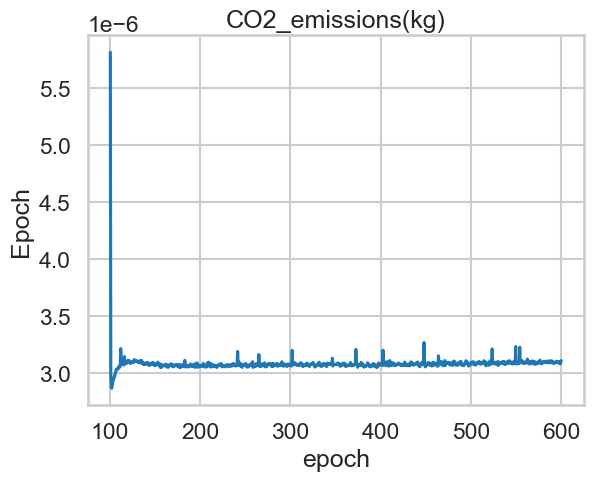

In [32]:
ax = sns.lineplot(data=eco2ai_df, x="epoch", y="CO2_emissions(kg)")
ax.set_xticklabels(x_tick)

ax.set_title('CO2_emissions(kg)')
ax.set_ylabel('CO2_emissions(kg)')
ax.set_ylabel('Epoch')
fig = ax.get_figure()
fig.savefig("co2_emission.png") 

/var/folders/k1/kp3fm3gx4mx0j1y6zg366vsw0000gn/T/ipykernel_11721/1433467774.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick)


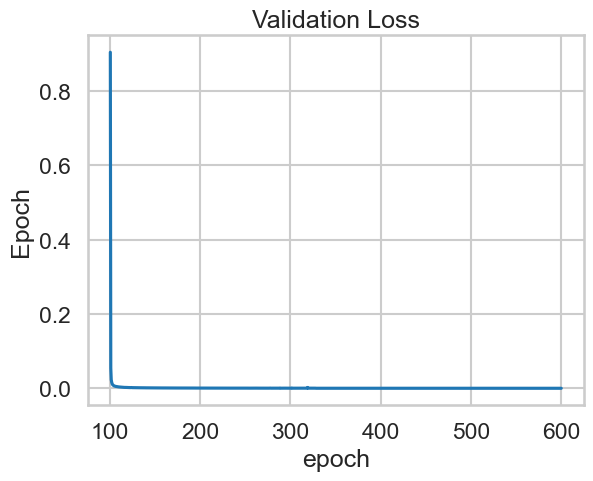

In [33]:
ax = sns.lineplot(data=eco2ai_df, x="epoch", y="validation_loss")
ax.set_xticklabels(x_tick)

ax.set_title('Validation Loss')
ax.set_ylabel('Validation Loss)')
ax.set_ylabel('Epoch')
fig = ax.get_figure()
fig.savefig("validation_loss.png") 

/var/folders/k1/kp3fm3gx4mx0j1y6zg366vsw0000gn/T/ipykernel_11721/2699080214.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick)


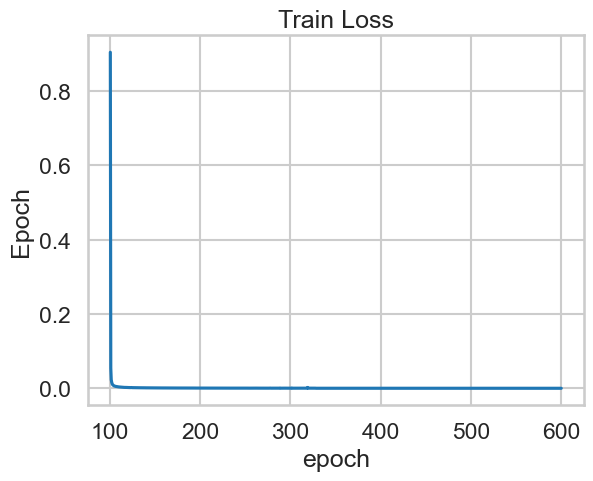

In [35]:
ax = sns.lineplot(data=eco2ai_df, x="epoch", y="train_loss")
ax.set_xticklabels(x_tick)

ax.set_title('Train Loss')
ax.set_ylabel('Train Loss)')
ax.set_ylabel('Epoch')
fig = ax.get_figure()
fig.savefig("train_loss.png") 

In [36]:
### CodeCarbon Analysis:

In [46]:
CC_PATH = "/Users/leonid/Desktop/IrisHEP/repo/profiling/results/lxplus/gpu/codecarbon/codecarbon/"

In [47]:
import os
os.listdir(CC_PATH)

['info_code_carbon.csv',
 'decompression_code_carbon.csv',
 'emissions.csv',
 'log_codecarbon_1000e.log',
 'compression_code_carbon.csv',
 'train_code_carbon.csv',
 'plotting_code_carbon.csv']

In [50]:
train_cc_df = pd.read_csv(CC_PATH+"emissions.csv")
compress_cc_df = pd.read_csv(CC_PATH+"decompression_code_carbon.csv")
decompress_cc_df = pd.read_csv(CC_PATH+"compression_code_carbon.csv")

In [52]:
train_cc_df.keys()

Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
       'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
       'tracking_mode', 'on_cloud', 'pue'],
      dtype='object')

In [ ]:
ax = sns.lineplot(data=eco2ai_df, x="epoch", y="emissions")
ax.set_xticklabels(x_tick)

ax.set_title('Train Loss')
ax.set_ylabel('Train Loss)')
ax.set_ylabel('Epoch')
fig = ax.get_figure()
fig.savefig("train_loss.png") 


In [51]:
ax = sns.lineplot(data=eco2ai_df, x="epoch", y="emissions")
ax.set_xticklabels(x_tick)

ax.set_title('Train Loss')
ax.set_ylabel('Train Loss)')
ax.set_ylabel('Epoch')
fig = ax.get_figure()
fig.savefig("train_loss.png") 


,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2023-09-04T14:16:50,codecarbon,d2b2b6ed-0ee3-4fb1-9354-688eea2fce9d,0.001645,1.522915e-09,9.260028e-07,42.5,0.000000,60.255361,1.793504e-08,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,0,NaN,6.1385,46.1953,160.680962,machine,N,1.0
1,2023-09-04T14:17:58,codecarbon,215ba58f-114a-462c-91cd-0108b5d9d705,0.001671,1.560046e-09,9.335581e-07,42.5,0.000000,60.255361,1.812081e-08,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,0,NaN,6.1385,46.1953,160.680962,machine,N,1.0
2,2023-09-06T13:51:13,codecarbon,a75d5900-f900-4d6c-bd8f-97c686253525,7.423558,1.377258e-05,1.855253e-06,42.5,39.086335,60.255361,8.763766e-05,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,1,1 x Tesla T4,6.1385,46.1953,160.680962,machine,N,1.0
3,2023-09-06T13:51:19,codecarbon,6d93c953-c233-4793-b045-1e58073c4bb2,4.780003,9.272463e-06,1.939845e-06,42.5,45.575918,60.255361,5.642912e-05,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,1,1 x Tesla T4,6.1385,46.1953,160.680962,machine,N,1.0
4,2023-09-06T13:51:25,codecarbon,c966b72a-3cb2-499a-9eb0-023326848df4,4.721087,9.181855e-06,1.944861e-06,42.5,45.960250,60.255361,5.573359e-05,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,1,1 x Tesla T4,6.1385,46.1953,160.680962,machine,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2023-09-06T15:32:18,codecarbon,38ae6813-529d-490e-9955-18cb890c1c32,4.779414,9.447925e-06,1.976796e-06,42.5,48.401305,60.255361,5.642212e-05,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,1,1 x Tesla T4,6.1385,46.1953,160.680962,machine,N,1.0
998,2023-09-06T15:32:24,codecarbon,318b1757-80da-47f0-ac5d-b760f0853d31,4.697072,9.342399e-06,1.988984e-06,42.5,49.334372,60.255361,5.544994e-05,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,1,1 x Tesla T4,6.1385,46.1953,160.680962,machine,N,1.0
999,2023-09-06T15:32:29,codecarbon,2f47a8e6-4bd7-4329-a3a8-d06f59616c84,4.689099,9.333959e-06,1.990565e-06,42.5,49.500540,60.255361,5.535553e-05,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,1,1 x Tesla T4,6.1385,46.1953,160.680962,machine,N,1.0
1000,2023-09-06T15:32:36,codecarbon,daf74403-5a69-466a-a78e-6c15b212e045,5.014759,9.933793e-06,1.980911e-06,42.5,48.714208,60.255361,5.920037e-05,...,28,Intel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz,1,1 x Tesla T4,6.1385,46.1953,160.680962,machine,N,1.0
